In [1]:
import pandas as pd
import numpy as np
from matplotlib import cm, pyplot as plt
%matplotlib inline
from hmmlearn import hmm
import math
import os
from IPython.display import display
from pandas import ExcelWriter

# Load The Data

In [2]:
houses = {}
for i in range(1,7):
    house_name = 'house_{}'.format(i)
    data_name = 'house_{}.csv'.format(i)
    houses[house_name] = pd.read_csv(data_name)

# Convert raw time data to formatted time

In [3]:
for house_key in houses.keys():
    house = houses[house_key]
    house= house.drop('Unnamed: 0', axis = 1)
    house['time'] = pd.to_datetime(house['time'],format = '%Y-%m-%d %H:%M:%S')
    house['Weekday'] = house['time'].dt.weekday
    house['Hour'] = house['time'].dt.hour
    house['Minute'] = house['time'].dt.minute
    house['Seconds'] = house['time'].dt.second
    house['Month'] = house['time'].dt.month
    house['Day'] = house['time'].dt.day
    houses[house_key] = house

## Setting index to Datetime

In [4]:
# df_houses = {}
for house_key in houses.keys():
    house = houses[house_key]
    house['Datetime']= pd.to_datetime(house['time'], format = '%Y-%m-%d %H:%M:%S')
    house = house.set_index('Datetime')
    house = house.drop('time', axis=1)
    houses[house_key] = house  

## Load all the processed data with selected features

In [5]:
path = 'csv training data/'
train_data_full = {}
names = list(houses['house_1'])[:-6]

sorted_names = sorted(names)

a,b = sorted_names.index('kitchen_outlets_x'), sorted_names.index('kitchen_outlets_x.1')
c,d = sorted_names.index('kitchen_outlets_y'), sorted_names.index('kitchen_outlets_y.1')
sorted_names[b], sorted_names[a] = sorted_names[a], sorted_names[b]
sorted_names[d], sorted_names[c] = sorted_names[c], sorted_names[d]


for (i,filename) in enumerate(os.listdir(path)):
    train_data_full[sorted_names[i]] = pd.read_csv(path + filename)

In [7]:
list(train_data_full)

['bathroom_gfi',
 'dishwaser',
 'electric_heat',
 'kitchen_outlets_x.1',
 'kitchen_outlets_x',
 'kitchen_outlets_y.1',
 'kitchen_outlets_y',
 'lighting',
 'lighting_x',
 'lighting_y',
 'mains_x',
 'mains_y',
 'microwave',
 'oven_x',
 'oven_y',
 'refrigerator',
 'stove',
 'washer_dryer',
 'washer_dryer_x',
 'washer_dryer_y']

In [172]:
train_data_full['stove']

,Datetime,min_d,max_d,mean_h,var_h,baseline_d,hour,weekday,label,Power
0,2011-04-18 13:22:13,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0
1,2011-04-18 13:22:16,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0
2,2011-04-18 13:22:20,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0
3,2011-04-18 13:22:23,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0
4,2011-04-18 13:22:26,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0
5,2011-04-18 13:22:30,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0
6,2011-04-18 13:22:33,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0
7,2011-04-18 13:22:37,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0
8,2011-04-18 13:22:40,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0
9,2011-04-18 13:22:44,0.0,9.0,0.732773,5.637224,0.0,13,0,stove,0.0


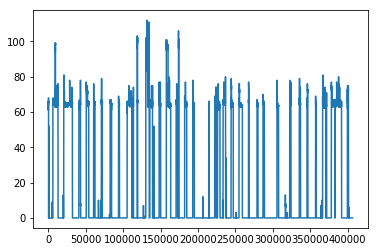

In [6]:
plt.plot(train_data_full['lighting_y']['Power']) # bathroom, microwave, lighting_y, 

## Preparing Data for HHM

In [7]:
class_full_data = pd.concat([train_data_full['refrigerator'],train_data_full['microwave'],train_data_full['oven_x'],train_data_full['washer_dryer']])
class_full_data_x = class_full_data
class_full_data_y = class_full_data
class_refrigerator_x = train_data_full['refrigerator']
class_microwave_x = train_data_full['microwave']
class_ovenx_x = train_data_full['oven_x']
class_washerdryer_x = train_data_full['washer_dryer_x']
class_electricheat = train_data_full['electric_heat']
class_stove = train_data_full['stove']
class_bathroomgfi = train_data_full['bathroom_gfi']
class_lightingy = train_data_full['lighting_y']
class_lightingx = train_data_full['lighting_x']

In [8]:
refrigerator_train = class_refrigerator_x['Power'][:32000] - class_refrigerator_x['baseline_d'][:32000]
microwave_train = class_microwave_x['Power'][:320000] - class_microwave_x['baseline_d'][:320000]
ovenx_train = class_ovenx_x['Power'][:320000] - class_ovenx_x['baseline_d'][:320000]
washerdryer_train = class_washerdryer_x['Power'][:320000] - class_washerdryer_x['baseline_d'][:320000]
electricheat_train = class_electricheat['Power'][:320000] - class_electricheat['baseline_d'][:320000]
stove_train = class_stove['Power'][:32000] - class_stove['Power'][:320000]
bathroomgfi_train = class_bathroomgfi['Power'][:320000] - class_bathroomgfi['baseline_d'][:320000]
lightingx_train = class_lightingx['Power'][:320000] - class_lightingx['baseline_d'][:320000]
lightingy_train = class_lightingy['Power'][:320000] - class_lightingy['baseline_d'][:320000]

# refrigerator_train = class_refrigerator_x['Power'][:320000]
# microwave_train = class_microwave_x['Power'][:320000]
# ovenx_train = class_ovenx_x['Power'][:320000]
# washerdryer_train = class_washerdryer_x['Power'][:320000]

ovenx_test = class_ovenx_x['Power'][320000:] - class_ovenx_x['baseline_d'][320000:]
microwave_test = class_microwave_x['Power'][320000:] - class_microwave_x['baseline_d'][320000:]
refrigerator_test = class_refrigerator_x['Power'][320000:] - class_refrigerator_x['baseline_d'][320000:]
washerdryer_test = class_washerdryer_x['Power'][320000:] - class_washerdryer_x['baseline_d'][320000:]
electricheat_train = class_electricheat['Power'][320000:] - class_electricheat['baseline_d'][320000:]
stove_train = class_stove['Power'][32000:] - class_stove['Power'][320000:]
bathroomgfi_test = class_bathroomgfi['Power'][320000:] - class_bathroomgfi['baseline_d'][320000:]
lightingx_test = class_lightingx['Power'][320000:] - class_lightingx['baseline_d'][320000:]
lightingy_test = class_lightingy['Power'][320000:] - class_lightingy['baseline_d'][320000:]

aggregate_data_train = refrigerator_train+microwave_train
aggregate_data_test = refrigerator_test+microwave_test

## Refrigerator

### First train the parameters on the refrigerator training data

Text(0.5,1,'Refrigerator Training')

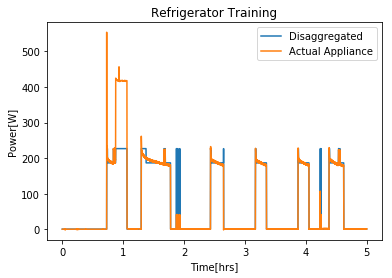

In [38]:
refrigerator_mean= train_data_full['refrigerator']['mean_h']
X_train = np.column_stack([refrigerator_train])
hmm_model_fridge = hmm.GMMHMM(n_components=4, covariance_type="full",n_iter = 1000,algorithm = 'viterbi')
hmm_model_fridge.fit(X_train)
hidden_states = hmm_model_fridge.predict(X_train)
means = hmm_model_fridge.means_.round().astype(int).flatten().tolist()
predict_levels = np.array([means[state] for state in hidden_states])
plt.figure()
xaxis = np.linspace(0,5,num=6000)
plt.plot(xaxis, predict_levels[:6000], label = 'Disaggregated')
plt.plot(xaxis, np.array(refrigerator_train[:6000]), label = 'Actual Appliance')
plt.xlabel('Time[hrs]')
plt.ylabel('Power[W]')
plt.legend()
plt.title('Refrigerator Training')

### Then apply the trained model to the aggregaed data

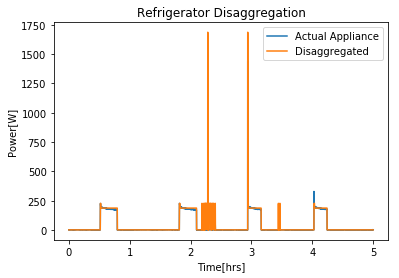

In [39]:
## Trying it on the aggregated test case
X_test = np.column_stack([aggregate_data_test])

hidden_states_test = hmm_model_fridge.predict(X_test)
means = hmm_model_fridge.means_.round().astype(int).flatten().tolist()
predict_levels = np.array([means[state] for state in hidden_states_test])

plt.figure()
xaxis = np.linspace(0,5,num=6000)
plt.plot(xaxis, np.array(refrigerator_test[:6000]), label = 'Actual Appliance')
plt.plot(xaxis, predict_levels[:6000], label = 'Disaggregated')
plt.xlabel('Time[hrs]')
plt.ylabel('Power[W]')
plt.legend()
plt.title('Refrigerator Disaggregation')
plt.savefig('ref_5hrs.png', bbox_inches='tight')

### Get the aggregation percentages

In [28]:
consump_percent_actual = sum(np.array(refrigerator_test[:6000])) / sum(aggregate_data_test[:6000])
consump_percent_pred = sum(np.array(predict_levels[:6000])) / sum(aggregate_data_test[:6000])
print(consump_percent_actual)
print(consump_percent_pred)

0.77949975861
0.91885829023


## microwave

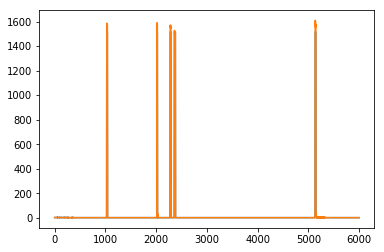

In [40]:
## Train
X_train = np.column_stack([microwave_train])
hmm_model_microwave = hmm.GMMHMM(n_components=5, covariance_type="full",n_iter = 1000,algorithm = 'viterbi')
hmm_model_microwave.fit(X_train)
hidden_states = hmm_model_microwave.predict(X_train)
means = hmm_model_microwave.means_.round().astype(int).flatten().tolist()
predict_levels = np.array([means[state] for state in hidden_states])
plt.plot(predict_levels[:6000])
plt.plot(np.array(microwave_train[:6000]))

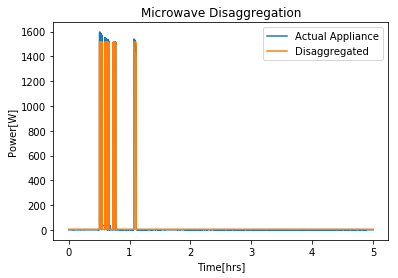

In [41]:
## Trying it on the aggregated test case
X_test = np.column_stack([aggregate_data_test])

hidden_states_test = hmm_model_microwave.predict(X_test)
means = hmm_model_microwave.means_.round().astype(int).flatten().tolist()
predict_levels = np.array([means[state] for state in hidden_states_test])

plt.figure()
xaxis = np.linspace(0,5,num=6000)
plt.plot(xaxis, np.array(microwave_test[46000:52000]), label = 'Actual Appliance')
plt.plot(xaxis, predict_levels[46000:52000], label = 'Disaggregated')
plt.xlabel('Time[hrs]')
plt.ylabel('Power[W]')
plt.legend()
plt.title('Microwave Disaggregation')
plt.savefig('micro_5hrs.png', bbox_inches='tight')

### Aggregation percentages

In [42]:
consump_percent_actual = sum(np.array(microwave_test[46000:52000])) / sum(aggregate_data_test[46000:52000])
consump_percent_pred = sum(np.array(predict_levels[46000:52000])) / sum(aggregate_data_test[46000:52000])
print(consump_percent_actual)
print(consump_percent_pred)

0.23853778576
0.254697018365


## Oven_x